In [ ]:
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 108.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 128.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.4
    Uninstalling widgetsnbextension-3.6.4:
      Successfully uninstalled widgetsnbextension-3.6.4
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled P

In [ ]:
import sys
import numpy as np
import open3d as o3d
# 縮尺 → 推定半径

In [1]:
# filename = sys.argv[1]
filename = '/content/drive/MyDrive/PointCloudData/point_cloud_mark2+.ply'

print("Loading a point cloud from", filename)
pcd_doki = o3d.io.read_point_cloud(filename)

print(pcd_doki) # 点の数
print(np.asarray(pcd_doki.points)) ## 此処でnumpyに変換して表示してる

o3d.visualization.draw_plotly([pcd_doki])

Loading a point cloud from /content/drive/MyDrive/PointCloudData/point_cloud_mark2+.ply


NameError: ignored

In [ ]:
# open3d.io.read_point_cloud で読み込んだ返り値は open3d.geometry.PointCloud
# pointsとcolorsで対応する点が前から順番に格納されている

# for x in pcd.colors:
#   print(x)

for x in pcd.points:
  print(x)
#  point_load = np.asarray(pcd.points)

In [ ]:

#import numpy as np
# numpy array  to Open3D format.
# pcd = o3d.geometry.PointCloud()
# np_points = np.random.rand(100, 3)

# From numpy to Open3D
#pcd.points = o3d.utility.Vector3dVector(np_points)

# From Open3D to numpy
# np_points = np.asarray(pcd.colors)

# print(np_points)

print(np.asarray(pcd_doki.points))
print("colors")
print(np.asarray(pcd_doki.colors))

# # ランダムな点を生成
# data = np.random.rand(10, 3)

# # Open3Dの点群に変換
# pointcloud = o3d.PointCloud()
# pointcloud.points = o3d.Vector3dVector(data)

# # ランダムに打った点を可視化
# o3d.draw_plotly([pointcloud])


[[-0.33372563 -0.06350313  0.04103996]
 [-0.15593907 -0.11909681 -0.16256106]
 [ 0.07293771 -0.08514783 -0.1173844 ]
 ...
 [ 0.2500284   0.09859299 -0.11024281]
 [ 0.00582997 -0.09812929 -0.24244697]
 [ 0.17128384  0.10002208 -0.01486389]]
colors
[[0.22745098 0.2        0.16862745]
 [0.14509804 0.11764706 0.07843137]
 [0.16078431 0.09803922 0.04705882]
 ...
 [0.21176471 0.18431373 0.14509804]
 [0.07843137 0.04705882 0.03137255]
 [0.2627451  0.2        0.1372549 ]]


In [ ]:
np_col = np.asarray(pcd_doki.colors)

print(np_col * 255.0)


[[58. 51. 43.]
 [37. 30. 20.]
 [41. 25. 12.]
 ...
 [54. 47. 37.]
 [20. 12.  8.]
 [67. 51. 35.]]


In [ ]:

np_col255 = np_col * 255.0
pcd_color = o3d.geometry.PointCloud()


# From numpy to Open3D
pcd_color.points = o3d.utility.Vector3dVector(np_col255)
pcd_color.colors = o3d.utility.Vector3dVector(np_col255)

o3d.visualization.draw_plotly([pcd_color]
                            , window_name='Open3D'
                            , width=600, height=400
                            , mesh_show_wireframe=False
                            , point_sample_factor=1
                            , front=None
                            , lookat=None
                            , up=[255,255,255]
                            , zoom=1.0)

In [ ]:
# numpy_array[numpy_array[:,3] == 0]
# 4列目が”0”の行のみの行列

# https://note.nkmk.me/python-numpy-condition/

# np.all()は第一引数に渡したndarrayの要素がすべてTrueのときにTrueを返し、そうでないときはFalseを返す関数。
# 引数axisを渡すと、各軸（各次元）それぞれに対してすべての要素がTrueのときにTrueを返す。二次元配列の場合はaxis=0が列に対して、axis=1が行に対しての結果となる
# それぞれの結果を行または列のインデックス参照[行, 列]に与えると所望の行・列が抽出される。[行, :]の場合、末尾の, :は省略できる。

bool_rows = np.all(np_col255 < 150, axis=1)
# print('判定 rows')
# print(bool_rows)
# print('select rows')
# print(np_col255[bool_rows])


# From numpy to Open3D
pcd_color2 = o3d.geometry.PointCloud()

pcd_color2.points = o3d.utility.Vector3dVector(np_col255[bool_rows])
pcd_color2.colors = o3d.utility.Vector3dVector(np_col255[bool_rows])

o3d.visualization.draw_plotly([pcd_color2]
                            , window_name='Open3D'
                            , width=600, height=400
                            , mesh_show_wireframe=False
                            , point_sample_factor=1
                            , front=None
                            , lookat=None
                            , up=[255,255,255]
                            , zoom=1.0)

In [ ]:
pcd_doki2 = o3d.geometry.PointCloud()
np_doki = np.asarray(pcd_doki.points)

pcd_doki2.points = o3d.utility.Vector3dVector(np_doki[bool_rows])
pcd_doki2.colors = o3d.utility.Vector3dVector(np_col255[bool_rows])


o3d.visualization.draw_plotly([pcd_doki])
o3d.visualization.draw_plotly([pcd_doki2])

In [ ]:
# # 座標設定
# pcd.points.append([0.0,0.0,0.0])
# pcd.points.append([1.0,1.0,1.0])
# pcd.points.append([1.0,2.0,0.0])

# # 色設定
# pcd.colors.append([1.0,0.0,0.0]);
# pcd.colors.append([0.0,1.0,0.0]);
# pcd.colors.append([0.0,0.0,1.0]);

pcd_color_compare = o3d.geometry.PointCloud()


pcd_color_compare.points = o3d.utility.Vector3dVector(np_col255)
pcd_color_compare.colors = o3d.utility.Vector3dVector(np_col255)

pcd_color_compare.points.append([0.0,255.0,0.0])
pcd_color_compare.points.append([0.0,0.0,255.0])

pcd_color_compare.colors.append([0.0,255.0,0.0])
pcd_color_compare.colors.append([0.0,0.0,255.0])

o3d.visualization.draw_plotly([pcd_color_compare])

In [ ]:
# 読み込み
filename = '/content/drive/MyDrive/PointCloudData/metascan_20230226-1229.ply'
pcd_doki = o3d.io.read_point_cloud(filename)
np_doki = np.asarray(pcd_doki.points)

# rgbを１〜255に変換して白を識別
np_col = np.asarray(pcd_doki.colors) #* 255.0
bool_rows = np.all(np_col < 0.58823529411, axis=1) # 150/255

# 白い部分以外の点群にする
pcd_doki2 = o3d.geometry.PointCloud()

pcd_doki2.points = o3d.utility.Vector3dVector(np_doki[bool_rows])
pcd_doki2.colors = o3d.utility.Vector3dVector(np_col[bool_rows])

# 口縁の点を追加する
pcd_doki2.points.append([0.3893535,0.1332598,-0.05718139])
pcd_doki2.points.append([0.03052034,0.1392023,0.3268567])
pcd_doki2.points.append([0.1210611,0.1005367,0.2264852])

pcd_doki2.colors.append([0.0,1.0,0.0])
pcd_doki2.colors.append([0.0,1.0,0.0])
pcd_doki2.colors.append([0.0,1.0,0.0])


o3d.visualization.draw_plotly([pcd_doki2])

In [ ]:
def dog_axis(right_eye, left_eye, nose,zzz):
    origin = (right_eye + left_eye) / 2
    #原点を両目の中点とする
    px = right_eye - left_eye
    # x軸は左目→右目
    py = nose - origin
    # 「しっぽから鼻にむかう直線」

    """それぞれの単位ベクトルを計算"""
    ex = px / np.linalg.norm(px)
    ez = np.cross(px, py) / np.linalg.norm(np.cross(px, py))
    ey = np.cross(ez, ex)

    """変換行列 4x4 を作成"""
    #ローカル座標（犬から見た座標）を絶対座標に変換する行列
    R_LtoG = np.identity(4)

    R_LtoG[:3, :3] = np.array([ex, ey, ez]).T
    #回転行列を代入
    R_LtoG[:3, 3] = origin
    #移動ベクトルを代入

    #絶対座標からローカル座標（犬からみた座標）に変換する行列
    R_GtoL = np.identity(4)*zzz
    R_GtoL[:3, :3] = np.array([ex, ey, ez])
    R_GtoL[:3, 3] = - np.dot(np.array([ex, ey, ez]), origin)

    return (R_GtoL, R_LtoG)

In [ ]:
right_eye = np.array([0.3893535,0.1332598,-0.05718139])
left_eye = np.array([0.03052034,0.1392023,0.3268567])
nose = np.array([0.1210611,0.1005367,0.2264852])


R_GtoL, R_LtoG = dog_axis(right_eye, left_eye, nose,-1)
print(R_GtoL)
print(R_LtoG)

[[ 0.68267882 -0.01130559 -0.73063111 -0.04326273]
 [-0.05423594 -0.99790629 -0.03523504  0.15208296]
 [-0.72870302  0.06368068 -0.68186265  0.23624714]
 [-0.         -0.         -0.         -1.        ]]
[[ 0.68267882 -0.05423594 -0.72870302  0.20993692]
 [-0.01130559 -0.99790629  0.06368068  0.13623105]
 [-0.73063111 -0.03523504 -0.68186265  0.13483766]
 [ 0.          0.          0.          1.        ]]


In [ ]:
import copy
pcd_doki3 = copy.deepcopy(pcd_doki2).transform(R_GtoL)

o3d.visualization.draw_plotly([pcd_doki3])

In [ ]:
# 出力したけど何故か色情報が落ちてる

# filename = '/content/drive/MyDrive/PointCloudData/metascan_transform.xyzrgb'
filename = '/content/drive/MyDrive/PointCloudData/metascan_transform.ply'

o3d.io.write_point_cloud(filename, pcd_doki3)

True

In [ ]:
# 読み込み
filename = '/content/drive/MyDrive/PointCloudData/metascan_transform.ply'
pcd = o3d.io.read_point_cloud(filename)
o3d.visualization.draw_plotly([pcd])

In [ ]:
import copy
# 読み込み
filename = '/content/drive/MyDrive/PointCloudData/point_cloud-2 - Cloud.ply'
pcd_more = o3d.io.read_point_cloud(filename)


right_eye = np.array([-0.1455,-0.265,0.3015])
left_eye = np.array([-0.1419,0.1247,0.4284])
nose = np.array([-0.1179,-0.1000,0.3954])

R_GtoL, R_LtoG = dog_axis(right_eye, left_eye, nose,1)
pcd_more2 = copy.deepcopy(pcd_more).transform(R_GtoL)

# 出力
filename = '/content/drive/MyDrive/PointCloudData/point_cloud-2_position0.ply'
o3d.io.write_point_cloud(filename, pcd_more2)

# 表示
o3d.visualization.draw_plotly([pcd_more2])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 数値変換してX＝０の点だけ抜き出せばいいのでは？ →密度が少な過ぎてだめ

np_col = np.asarray(pcd_more2.points) 
bool_rows = np.where((np_col < 0.001)&(np_col > 0), True, False)[:,0] 
print(bool_rows)

# それだけの点群にする
pcd_more3 = o3d.geometry.PointCloud()

pcd_more3.points = o3d.utility.Vector3dVector(np_col[bool_rows])
pcd_more3.colors = pcd_more2.colors

# 表示
o3d.visualization.draw_plotly([pcd_more3])

[False False False ... False False False]


In [ ]:
# それかメッシュ変換した上で視覚化するか
# http://www.open3d.org/docs/latest/tutorial/Advanced/surface_reconstruction.html
# http://www.open3d.org/docs/release/tutorial/geometry/mesh.html

# 読み込み
filename = '/content/drive/MyDrive/PointCloudData/point_cloud-2_position0.ply'
pcd_more2 = o3d.io.read_point_cloud(filename)



# メッシュ化には法線が必要
# pcd = gt_mesh.sample_points_poisson_disk(5000)
pcd_more2.estimate_normals()
pcd_more2.orient_normals_consistent_tangent_plane(10)

#o3d.visualization.draw_plotly([pcd_more2], point_show_normal=True)

# TypeError: draw_plotly() got an unexpected keyword argument 'point_show_normal'


In [ ]:
# ボールピボット

radii = [0.005, 0.01, 0.02, 0.04]
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    pcd_more2, o3d.utility.DoubleVector(radii))
print([rec_mesh])
o3d.visualization.draw_plotly([rec_mesh],mesh_show_wireframe=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ポアソン曲面
print('run Poisson surface reconstruction')
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd_more2, depth=8)
print(mesh)
o3d.visualization.draw_plotly([mesh],mesh_show_wireframe=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
## 密度値を使用して、サポートが低い頂点と三角形を削除できます。
# import matplotlib.pyplot as plt
# densities = np.asarray(densities)
# density_colors = plt.get_cmap('winter')(
#     (densities - densities.min()) / (densities.max() - densities.min()))
# density_colors = density_colors[:, :3]
# density_mesh = o3d.geometry.TriangleMesh()
# density_mesh.vertices = mesh.vertices
# density_mesh.triangles = mesh.triangles
# density_mesh.triangle_normals = mesh.triangle_normals
# density_mesh.vertex_colors = o3d.utility.Vector3dVector(density_colors)
# o3d.visualization.draw_plotly([density_mesh])

AttributeError: ignored

In [ ]:
# vertices_to_remove = densities < np.quantile(densities, 0.01)
# mesh.remove_vertices_by_mask(vertices_to_remove)

In [ ]:
# 点の少ない方で試してみる

# 読み込み
filename = '/content/drive/MyDrive/PointCloudData/metascan_transform.ply'
pcd = o3d.io.read_point_cloud(filename)

# 法線推定
pcd.estimate_normals()
# 法線推定調整時の半径が重要！土器の最薄の厚みを考えないと
pcd.orient_normals_consistent_tangent_plane(10)


# ボールピボット
radii = [0.005, 0.01, 0.02, 0.04]
rec_mesh2 = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    pcd, o3d.utility.DoubleVector(radii))
print([rec_mesh2])

# ポアソン曲面
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    mesh2, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8)
print(mesh2)

[TriangleMesh with 7939 points and 15502 triangles.]
[Open3D DEBUG] Input Points / Samples: 7939 / 7598
[Open3D DEBUG] #   Got kernel density: 0.016715 (s), 1370.95 (MB) / 1370.95 (MB) / 2053 (MB)
[Open3D DEBUG] #     Got normal field: 0.0390489 (s), 1370.95 (MB) / 1370.95 (MB) / 2053 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 2.380288e-04 / 1.889710e+00
[Open3D DEBUG] #       Finalized tree: 0.066138 (s), 1370.95 (MB) / 1370.95 (MB) / 2053 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.333968 (s), 1370.95 (MB) / 1370.95 (MB) / 2053 (MB)
[Open3D DEBUG] #Set point constraints: 0.0258551 (s), 1370.95 (MB) / 1370.95 (MB) / 2053 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 214460 / 184296 / 60801
[Open3D DEBUG] Memory Usage: 1370.945 MB
[Open3D DEBUG] # Linear system solved: 0.333661 (s), 1370.95 (MB) / 1370.95 (MB) / 2053 (MB)
[Open3D DEBUG] Got average: 0.02125 (s), 1370.95 (MB) / 1370.95 (MB) / 2053 (MB)
[Open3D DEBUG] Iso-Value: 5.055211e-01 = 4.013332e+03 / 7.93

In [ ]:
o3d.visualization.draw_plotly([rec_mesh2])

In [ ]:
o3d.visualization.draw_plotly([mesh2])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 出力
filename = '/content/drive/MyDrive/PointCloudData/metascan_mesh.ply'
o3d.io.write_triangle_mesh(filename, mesh2)

True

In [ ]:
!pip install trimesh
import trimesh
import numpy as np
from shapely.geometry import LineString
%pylab inline
%config InlineBackend.figure_format = 'svg'
# http://3dcad.garyoutensei.com/6-2_CloudCompare.html#CC7
# https://stackoverflow.com/questions/60038105/find-what-is-material-and-what-is-air-in-2d-cross-sections-from-3d-stl-files-us


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.8/677.8 KB 11.1 MB/s eta 0:00:00
Populating the interactive namespace from numpy and matplotlib


In [ ]:
# !sudo apt install libspatialindex-dev
# !pip install rtree
# import rtree
# https://github.com/mikedh/trimesh/issues/941

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 340 kB of archives.
After this operation, 1,538 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex6 amd64 1.9.3-1build1 [266 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex-c6 amd64 1.9.3-1build1 [58.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex-dev amd64 1.9.3-1build1 [16.0 kB]
Fetched 340 kB in 2s (190 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dia

<trimesh.Path2D(vertices.shape=(8, 2), len(entities)=1)>


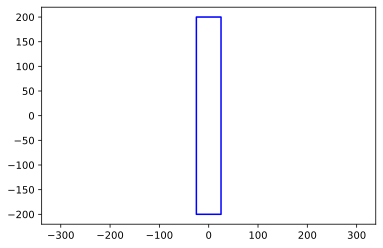

<AxesSubplot:>

In [ ]:
# Vertices
vert = np.array([[-200., -200.,    0.],
              [-200., -200.,   50.],
              [-200.,  200.,    0.],
              [-200.,  200.,   50.],
              [ 200., -200.,    0.],
              [ 200., -200.,   50.],
              [ 200.,  200.,    0.],
              [ 200.,  200.,   50.]])
# Faces
fa = np.array([[6, 0, 4],
              [0, 6, 2],
              [4, 6, 5],
              [6, 7, 5],
              [6, 2, 7],
              [2, 3, 7],
              [2, 0, 3],
              [0, 1, 3],
              [0, 4, 1],
              [4, 5, 1],
              [7, 1, 5],
              [1, 7, 3]])
# MESH
mesh = trimesh.Trimesh(vertices= vert,
                       faces=fa)
slice_ = mesh.section(plane_origin=(0,0,0), 
                     plane_normal=[1,0,0])

slice_2D, to_3D = slice_.to_planar()
#slice_2D.show()
print(slice_2D)
path2Dshow(slice_2D)

In [ ]:
import matplotlib.pyplot as plt
def path2Dshow(Path2D,filename):
        if Path2D.is_closed:
              plt.cla()
              axis = plt.gca()
              axis.set_aspect('equal', 'datalim')

              for i, points in enumerate(Path2D.discrete):
                  # 転置が必要
                  # axis.plot(*points.T, color=(0,0,1))
                  axis.plot(*points[:, ::-1].T, color=(0,0,1))
              
              # plt.xticks(color="None")
              # plt.yticks(color="None")
              # plt.tick_params(length=0)
              # 目盛線を設定
              axis.grid(which = "major", axis = "x", color = "green", alpha = 0.3, linewidth = 1)
              axis.grid(which = "major", axis = "y", color = "green", alpha = 0.3, linewidth = 1)
              # 補助目盛線を設定
              axis.minorticks_on()
              axis.grid(which = "minor", axis = "x", color = "green", alpha = 0.3, linestyle = "--", linewidth = 0.5)
              axis.grid(which = "minor", axis = "y", color = "green", alpha = 0.3, linestyle = "--", linewidth = 0.5)
              
              plt.savefig(filename, format="png", dpi=300)
              # plt.show()
              
              return axis
        else:
            return 'is_not_closed'


<trimesh.Trimesh(vertices.shape=(27710, 3), faces.shape=(55416, 3))>


<AxesSubplot:>

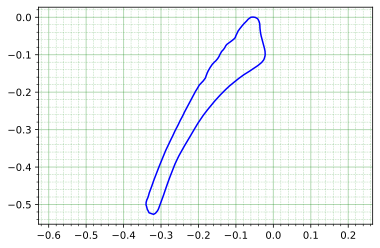

In [ ]:
# trimeshで断面
# https://stackoverflow.com/questions/69336886/python-trimesh-x-cross-section-produces-weird-result
filename = '/content/drive/MyDrive/PointCloudData/metascan_mesh.ply'
mesh2 = trimesh.load_mesh(filename)
print(mesh2)
# print(mesh2.centroid)
slice = mesh2.section(plane_origin=(0,0,0),#mesh2.centroid,
                     plane_normal=[1,0,0])

to_2D = trimesh.geometry.align_vectors([0,0,1], [1,0,0])

slice_2D, to_3D = slice.to_planar(to_2D = to_2D)
# slice_2D, to_3D = slice.to_planar()

# print(slice_2D)
filename = '/content/drive/MyDrive/PointCloudData/cross.png'
path2Dshow(slice_2D,filename)

In [ ]:
#半径を出す
#実際の縮尺値で点群位置を置き換え
#鏡像で外形線を置く
#正面トレース


<Figure size 432x288 with 0 Axes>

In [ ]:
# 画像化
# https://stackoverflow.com/questions/74248100/saving-cross-section-of-3d-object-by-trimesh-python

# memo コード ターゲットによるフォトグラメトリの自動化
# https://www.xlsoft.com/jp/blog/blog/2018/02/02/post-2937/

#Open3Dのカメラの取り扱い
#https://zenn.dev/fastriver/articles/open3d-camera-view-control